In [ ]:
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def get_brisk():
    brisk = cv2.BRISK_create()
    kp1, desc1 = brisk.detectAndCompute(img1, None)
    kp2, desc2 = brisk.detectAndCompute(img2, None)
    return kp1, desc1, kp2, desc2

In [ ]:
def brisk_bf_matcher(matches_number):
    kp1, desc1, kp2, desc2 = get_brisk()
    matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
    matches = matcher.match(desc1, desc2)
    matches = sorted(matches, key=lambda x: x.distance)

    return cv2.drawMatches(img1, kp1, img2, kp2, matches[:matches_number], None, flags=2)

In [ ]:
def brisk_custom_matcher(matches_number=10):
    kp1, desc1, kp2, desc2 = get_brisk()
    
    matches = []
    for i, d1 in enumerate(desc1, start=0):
        for j, d2 in enumerate(desc2, start=0):
            matches.append(cv2.DMatch(_trainIdx=j, _queryIdx=i, _distance=float(np.sum(d1 ^ d2)), _imgIdx=0))

    matches = sorted(matches, key=lambda sample: sample.distance)

    return cv2.drawMatches(img1, kp1, img2, kp2, matches[:matches_number], None, flags=2)

In [ ]:
def visualize(image):
    plt.figure(figsize=(12, 12))
    plt.imshow(image)

In [ ]:
def display_variants():
    visualize(image=brisk_bf_matcher(matches_number=15))
    visualize(image=brisk_custom_matcher(matches_number=15))

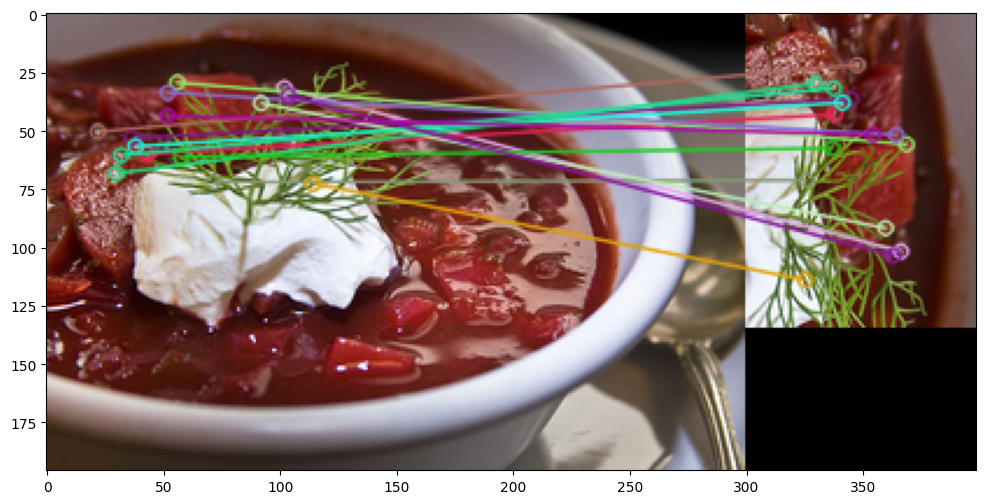

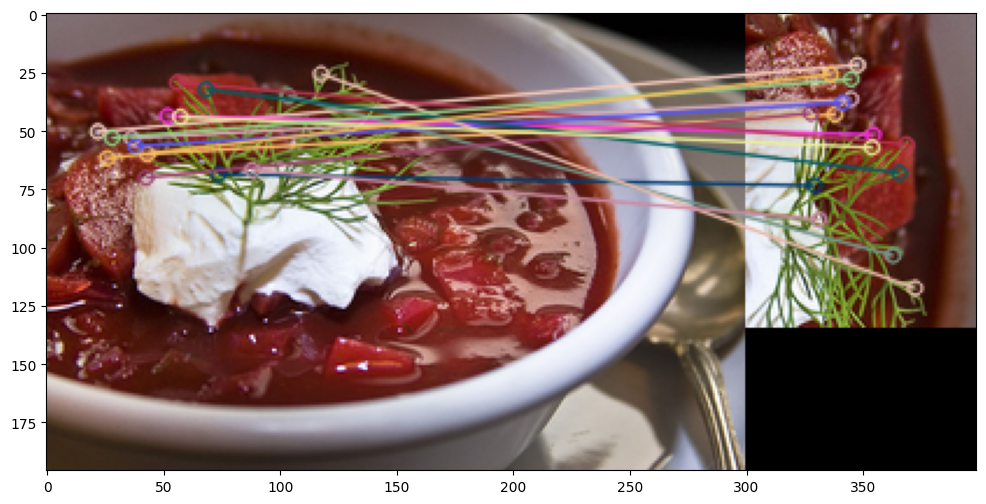

In [ ]:
img1 = cv2.cvtColor(cv2.imread('img1.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('img2.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
display_variants()

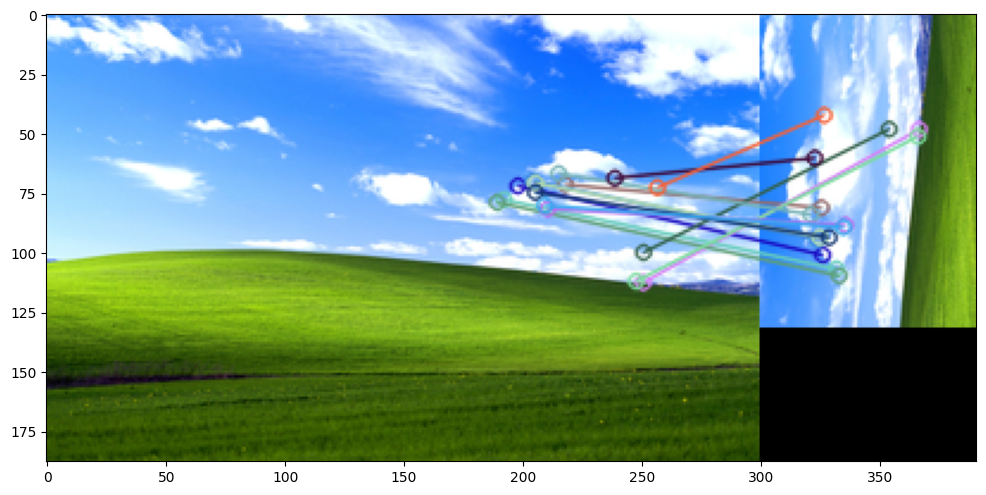

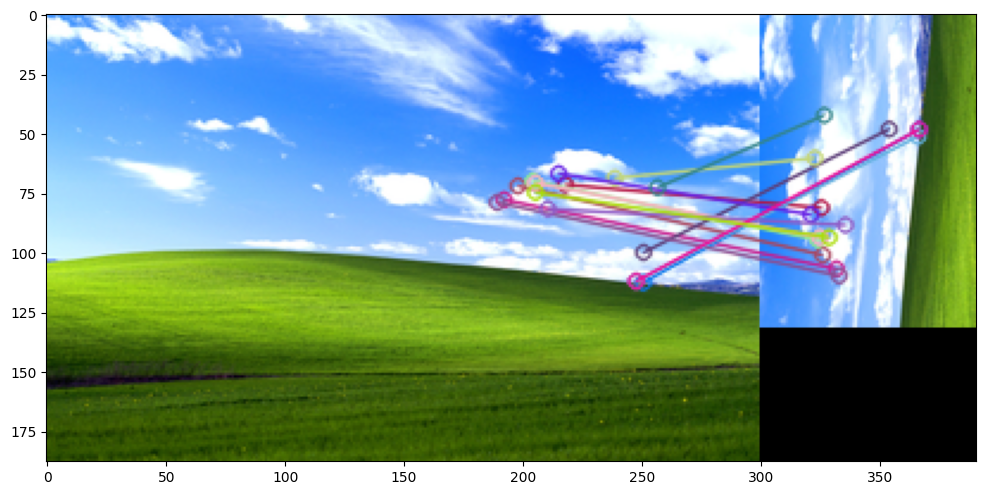

In [ ]:
img1 = cv2.cvtColor(cv2.imread('img3.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread('img4.png', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
display_variants()